In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data exploration

In [2]:
fd_train = pd.read_csv('train_FD001.txt', sep=" ", header=None)

In [3]:
fd_test = pd.read_csv('test_FD001.txt', sep=" ", header=None)

In [4]:
fd_train.describe

<bound method NDFrame.describe of         0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1        1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2        1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3        1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4        1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
...    ...  ...     ...     ...    ...     ...     ...      ...      ...   
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          9   ...       18      19    20   21    22  

All NaN columns should be dropped

In [ ]:
#fd_train.drop(columns = [26,27], inplace = True)

Let's name columns to understand the meaning of the data given

In [5]:
names_col=['unit_number', 'time_cycles', 'setting_1', 'setting_2','setting_3']
for i in range (len(fd_train.columns)-5):
  names_col.append('s_' + str(i+1))

fd_train.columns = names_col
fd_test.columns = names_col

In [23]:
print('Train data shape',fd_train.shape)
print('Test data shape',fd_test.shape)

Train data shape (20631, 19)
Test data shape (13096, 28)


Data cleaning

In our task we don't need seetings values

In [9]:
fd_train.drop(columns = ['setting_1','setting_2','setting_3'], inplace = True)

All NaN columns and columns with the same value should be dropped

In [11]:
fd_descr = fd_train.loc[:,'s_1':].describe().transpose()

In [12]:
fd_descr

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


In [13]:
zer_std = []

In [14]:
from numpy import NaN
for i, row in fd_descr.iterrows():
  if fd_descr['std'][i] == 0:
    zer_std.append(i)
  elif fd_descr['count'][i] == 0:
    zer_std.append(i)

In [15]:
zer_std

['s_1', 's_10', 's_18', 's_19', 's_22', 's_23']

As we can see s_1, s_10, s_18 and s_19 have the same values during all cycles of exploatation, so we will no have meaningfull info here too, let's drop it

In [16]:
fd_train.drop(columns = zer_std, inplace = True)

The columns in train and test should be equal

In [24]:
fd_test.drop(columns = zer_std, inplace = True)

In [25]:
fd_train.to_csv(r'clean_train_data.csv', index = False, header = True)
fd_test.to_csv(r'clean_test_data.csv', index = False, header = True)

# Data visualization

In [ ]:
fd_train

,unit_number,time_cycles,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_20,s_21
0,1,1,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,39.06,23.4190
1,1,2,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,39.00,23.4236
2,1,3,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,38.95,23.3442
3,1,4,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,38.88,23.3739
4,1,5,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,38.49,22.9735
20627,100,197,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,38.30,23.1594
20628,100,198,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,38.44,22.9333
20629,100,199,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,38.29,23.0640


In [ ]:
fd_cycles = fd_train[["unit_number","time_cycles"]]

In [ ]:
fd_cycles

,unit_number,time_cycles
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
20626,100,196
20627,100,197
20628,100,198
20629,100,199


In [ ]:
max_cycles = fd_cycles.groupby('unit_number').max()

In [ ]:
max_cycles['unit_number'] = max_cycles.index

In [ ]:
max_cycles

,time_cycles,unit_number
unit_number,,
1,192,1
2,287,2
3,179,3
4,189,4
5,269,5
...,...,...
96,336,96
97,202,97
98,156,98


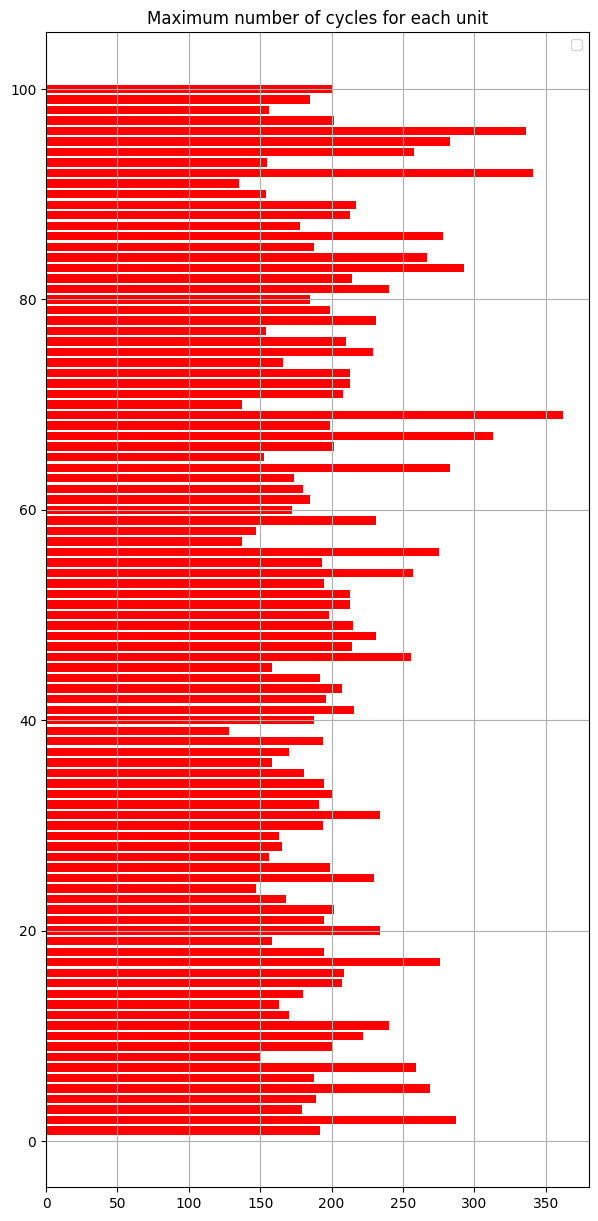

In [ ]:
plt.figure(figsize=(7, 15))
plt.title("Maximum number of cycles for each unit")
plt.barh(max_cycles['unit_number'], width = max_cycles['time_cycles'], color='r', )
#plt.plot(max_cycles['time_cycles'], max_cycles['unit_number'], color='r')
plt.legend()
plt.grid(True);

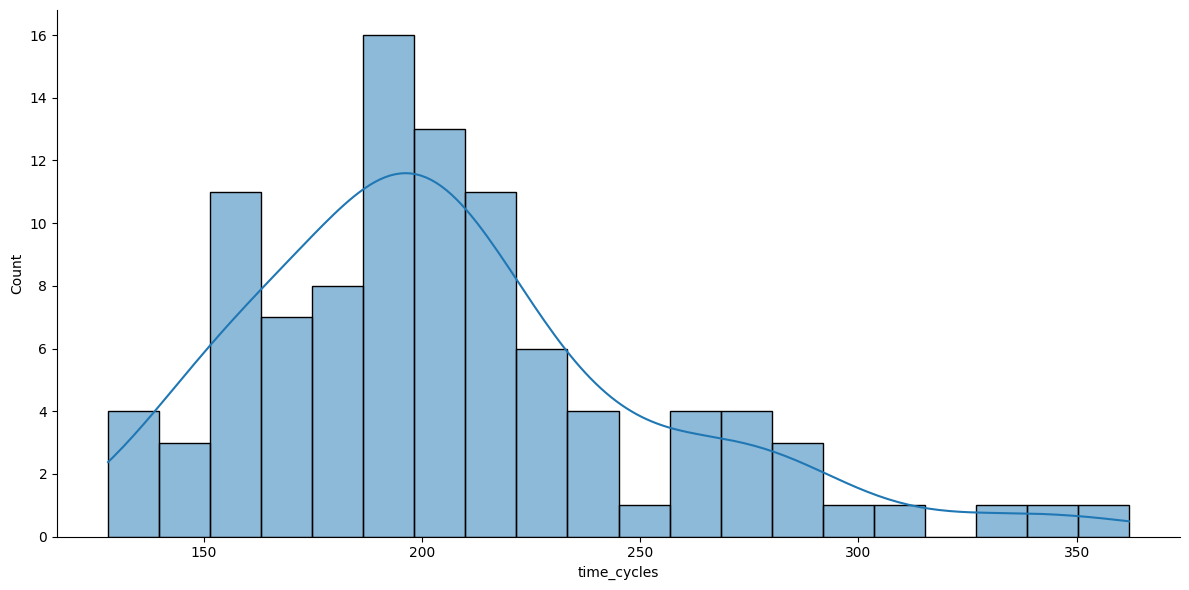

In [ ]:
sns.displot(max_cycles['time_cycles'], kde = True, bins = 20, height = 6, aspect = 2)